In [14]:
import numpy as np # biblioteca numpy para fazer caluclos matematicos
from sklearn.model_selection import train_test_split #importa da sklearn.model a biblioteca train test split, esta biblioteca serve
#para dividir os dados teste e treino
from sklearn.tree import DecisionTreeClassifier # vai importar o algoritimo  da arvore de decisão
from sklearn import tree # importa a biblioteca para plotar a arvore de decisão
import matplotlib.pyplot as plt # importa a biblioteca matplotlib 
import seaborn as sns # importa a biblioteca seaborn
from sklearn.metrics import accuracy_score # metrica de acuracia do algoritimo
from sklearn.metrics import precision_score # métrica de precisão de algoritimo
from sklearn.metrics import recall_score #métrica de recall do algoritimo
from sklearn.metrics import f1_score # métrica de f1 score
import pandas as pd #importa a bibioteca pandas
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("C:/Users/dsadm/Desktop/Codigos_IABD2024/Somativa/dadosacoes.csv")

In [ ]:
df.head() # exibe as 4 primeiras linhas do Dataframe

,nome ação,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
0,VALE3,194,45,2134
1,SUZB3,91,71,3069
2,SUZB3,165,41,2815
3,SUZB3,56,34,3613
4,GOOGLE,212,9,2975


In [4]:
#Obtendo informações do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   nome ação                       100 non-null    object
 1   preço ação R$                   100 non-null    int64 
 2   qtde cotas                      100 non-null    int64 
 3   valor de mercado R$ -(Bilhões)  100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.3+ KB


In [5]:
df.describe() #Análise estatistica

,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
count,100.000000,100.000000,100.00000
mean,136.140000,52.010000,2433.70000
std,75.237942,27.475791,1397.29373
min,15.000000,2.000000,52.00000
25%,67.000000,28.250000,1189.25000
50%,121.500000,55.500000,2433.00000
75%,209.000000,76.500000,3616.50000
max,253.000000,97.000000,4993.00000


In [9]:
x = df["nome ação"]
y = df["preço ação R$"]

<Axes: title={'center': 'Nome da ação x Preço da ação R$'}, xlabel='nome ação', ylabel='preço ação R$'>

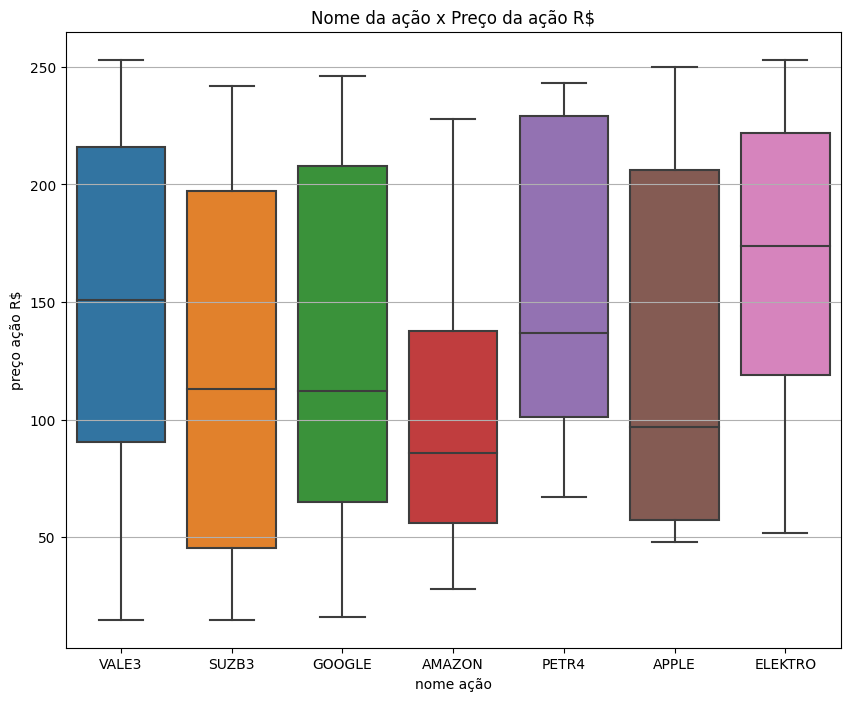

In [10]:
plt.figure(figsize=(10,8))
plt.grid()
plt.title('Nome da ação x Preço da ação R$')
sns.boxplot (x=x, y=y)

In [11]:
x2 = df["nome ação"]
y2 = df["valor de mercado R$ -(Bilhões)"]

<Axes: title={'center': 'Nome da ação x Valor de mercado'}, xlabel='nome ação', ylabel='valor de mercado R$ -(Bilhões)'>

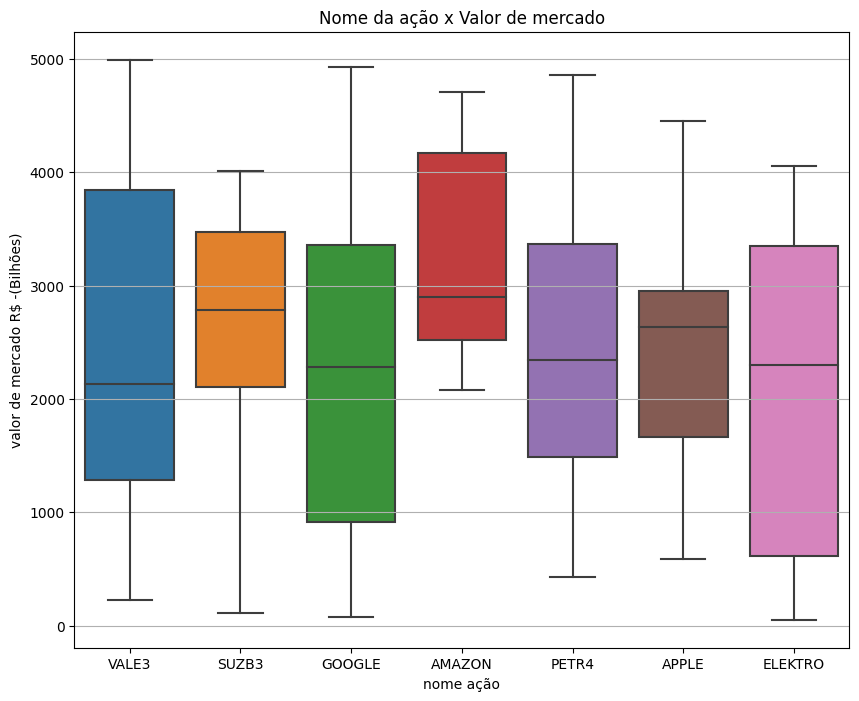

In [13]:
plt.figure(figsize=(10,8))
plt.grid()
plt.title('Nome da ação x Valor de mercado')
sns.boxplot (x=x2, y=y2)

In [17]:
# transforma a coluna de simbolos em true ou falso
dados_ativos = pd.get_dummies(df,columns=['nome ação'],drop_first=True) 

In [18]:
dados_ativos

,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões),nome ação_APPLE,nome ação_ELEKTRO,nome ação_GOOGLE,nome ação_PETR4,nome ação_SUZB3,nome ação_VALE3
0,194,45,2134,False,False,False,False,False,True
1,91,71,3069,False,False,False,False,True,False
2,165,41,2815,False,False,False,False,True,False
3,56,34,3613,False,False,False,False,True,False
4,212,9,2975,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...
95,208,78,3035,False,False,False,False,True,False
96,253,60,3263,False,False,False,False,False,True
97,99,35,980,False,False,True,False,False,False
98,82,43,1866,False,False,False,False,False,True


In [16]:
dados_ativos

,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões),nome ação_AMAZON,nome ação_APPLE,nome ação_ELEKTRO,nome ação_GOOGLE,nome ação_PETR4,nome ação_SUZB3,nome ação_VALE3
0,194,45,2134,False,False,False,False,False,False,True
1,91,71,3069,False,False,False,False,False,True,False
2,165,41,2815,False,False,False,False,False,True,False
3,56,34,3613,False,False,False,False,False,True,False
4,212,9,2975,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
95,208,78,3035,False,False,False,False,False,True,False
96,253,60,3263,False,False,False,False,False,False,True
97,99,35,980,False,False,False,True,False,False,False
98,82,43,1866,False,False,False,False,False,False,True


In [19]:
# aplicando o Kmeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(dados_ativos)

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [20]:
sse = kmeans.inertia_
print('SSE',sse)

SSE 13009660.390732601


In [21]:
# Visualizando o resultado dos agrupamentos
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

Text(0.5, 1.0, 'Analisando o preço das ações (Kluster=4)')

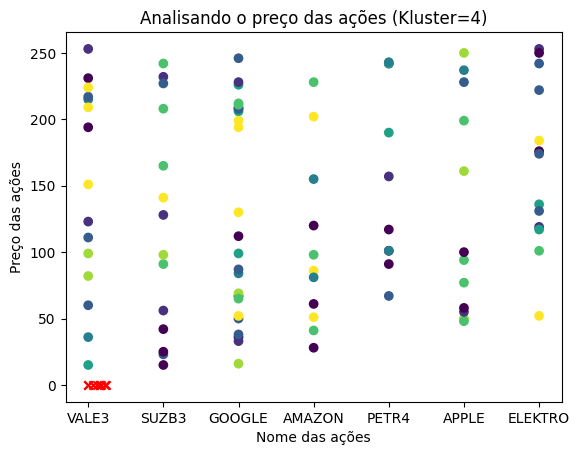

In [47]:
plt.scatter(df['nome ação'],df['preço ação R$'],c =labels)
plt.scatter(centroids[:,4],centroids[:,4],marker='x',color='red')
plt.xlabel('Nome das ações')
plt.ylabel('Preço das ações')
plt.title('Analisando o preço das ações (Kluster=4)')

In [26]:
# aplicando o Kmeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(dados_ativos)

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [27]:
# Visualizando o resultado dos agrupamentos
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

Text(0.5, 1.0, 'Analisando o preço das ações Kluster=5')

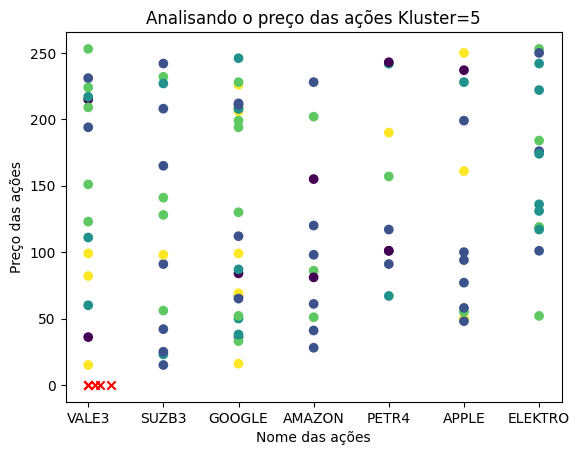

In [ ]:
plt.scatter(df['nome ação'],df['preço ação R$'],c =labels)
plt.scatter(centroids[:,4],centroids[:,4],marker='x',color='red')
plt.xlabel('Nome das ações')
plt.ylabel('Preço das ações')
plt.title('Analisando o preço das ações (Kluster=5)')

In [31]:
# aplicando o Kmeans
kmeans = KMeans(n_clusters=8)
kmeans.fit(dados_ativos)

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans()

In [32]:
# Visualizando o resultado dos agrupamentos
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

Text(0.5, 1.0, 'Analisando o preço das ações (Kluster=8)')

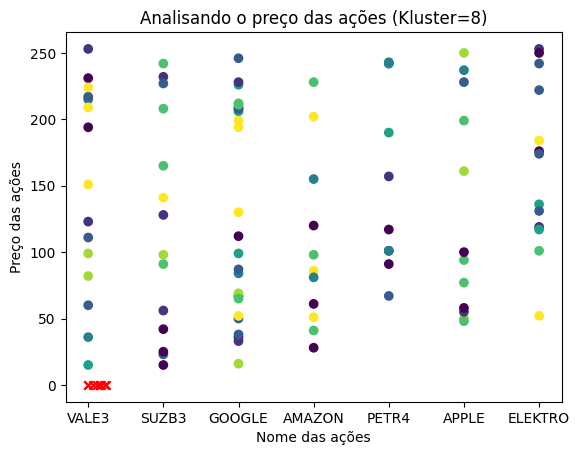

In [33]:
plt.scatter(df['nome ação'],df['preço ação R$'],c =labels)
plt.scatter(centroids[:,4],centroids[:,4],marker='x',color='red')
plt.xlabel('Nome das ações')
plt.ylabel('Preço das ações')
plt.title('Analisando o preço das ações (Kluster=8)')

In [24]:
# Analisando os outros grupos restantes
dados_ativos['Grupo'] = labels
grouped_data = dados_ativos.groupby('Grupo').mean()
print(grouped_data)

       preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)  \
Grupo                                                              
0         151.840000   55.600000                     3180.960000   
1         153.038462   50.307692                      553.961538   
2         100.428571   53.500000                     2120.464286   
3         144.142857   47.857143                     4289.047619   

       nome ação_APPLE  nome ação_ELEKTRO  nome ação_GOOGLE  nome ação_PETR4  \
Grupo                                                                          
0             0.200000           0.120000          0.160000         0.080000   
1             0.038462           0.230769          0.384615         0.115385   
2             0.178571           0.071429          0.214286         0.107143   
3             0.047619           0.095238          0.238095         0.095238   

       nome ação_SUZB3  nome ação_VALE3  
Grupo                                    
0             0.280000    

In [25]:
def avaliacao(dados_ativos):
    inercia = []
    silhueta = []

In [34]:
def avaliacao(dados_ativos):
    inercia = []
    silhueta = []

    for k in range(2,5):
        kmeans = KMeans(n_clusters=k, random_state=45, n_init='auto')
        kmeans.fit(dados_ativos)
        inercia.append(kmeans.inertia_)
        silhueta.append(f'k={k} - '+ str(silhouette_score(dados_ativos, kmeans.predict(dados_ativos))))
        
    return silhueta, inercia

In [35]:
from sklearn.metrics import silhouette_score

In [36]:
silhueta, inercia = avaliacao(dados_ativos)
silhueta

['k=2 - 0.5603589934133193',
 'k=3 - 0.622348940889783',
 'k=4 - 0.5271376245236558']

In [38]:
# analisando a metrica inercia
def plot_cotovelo(inercia):
    plt.figure(figsize=(8,4))
    plt.plot(range(2,5),inercia,'bo-')
    plt.xlabel('Número de clusters')
    plt.ylabel('Inércia')
    plt.title('Método do Cotovelo para Determinação de k')
    plt.show()

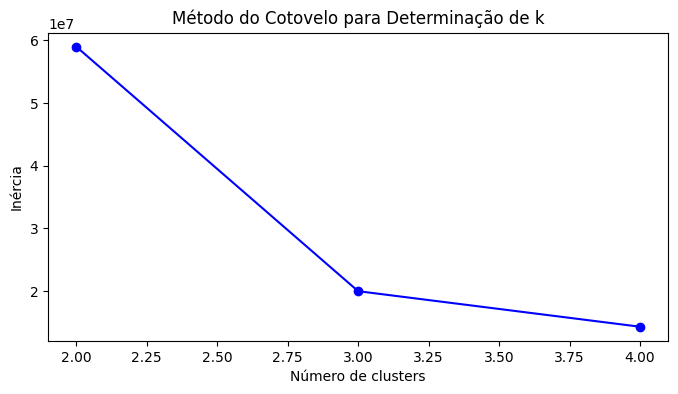

In [39]:
plot_cotovelo(inercia)

In [40]:
# Grafico da silhueta dos agrupamentos 
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples

def graf_silhueta (n_clusters, dados_n):

    # Aplica o KMeans ao conjunto de dados
    kmeans = KMeans(n_clusters=n_clusters, random_state=45, n_init = 'auto')
    cluster_previsoes = kmeans.fit_predict(dados_ativos)
    
    # Calcula o silhouette score médio
    silhueta_media = silhouette_score(dados_ativos, cluster_previsoes)
    print(f'Valor médio para {n_clusters} clusters: {silhueta_media:.3f}')
    
    # Calcula a pontuação de silhueta para cada amostra
    silhueta_amostra = silhouette_samples(dados_ativos, cluster_previsoes)
    
    # Configuração da figura para o gráfico de silhueta
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(9, 7)
    
    # Limites do gráfico de silhueta
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(dados_n) + (n_clusters + 1) * 10])
    
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhueta_amostra = silhueta_amostra[cluster_previsoes == i]
        ith_cluster_silhueta_amostra.sort()
        
        tamanho_cluster_i = ith_cluster_silhueta_amostra.shape[0]
        y_upper = y_lower + tamanho_cluster_i
        
        cor = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhueta_amostra, 
            facecolor=cor, edgecolor=cor, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * tamanho_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 para o espaço entre gráficos
        
    # Linha vertical para a média do Silhouette Score
    ax1.axvline(x=silhueta_media, color='red', linestyle='--')
        
    ax1.set_title(f'Gráfico da Silhueta para {n_clusters} clusters')
    ax1.set_xlabel('Valores do coeficiente de silhueta')
    ax1.set_ylabel('Rótulo do cluster')
    
    ax1.set_yticks([])  # Remove os ticks do eixo y
    ax1.set_xticks([i/10.0 for i in range(-1, 11)])
    
    plt.show()

Valor médio para 3 clusters: 0.622


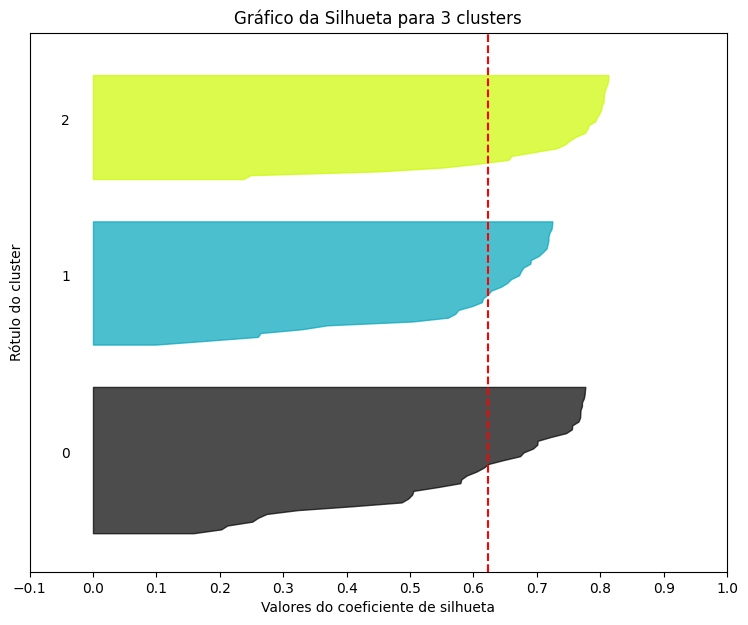

In [41]:
graf_silhueta(3,dados_ativos)

In [42]:
# Bibliotecas para plotar o gráfico em 3d
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0, 'valor de mercado R$ -(Bilhões)')

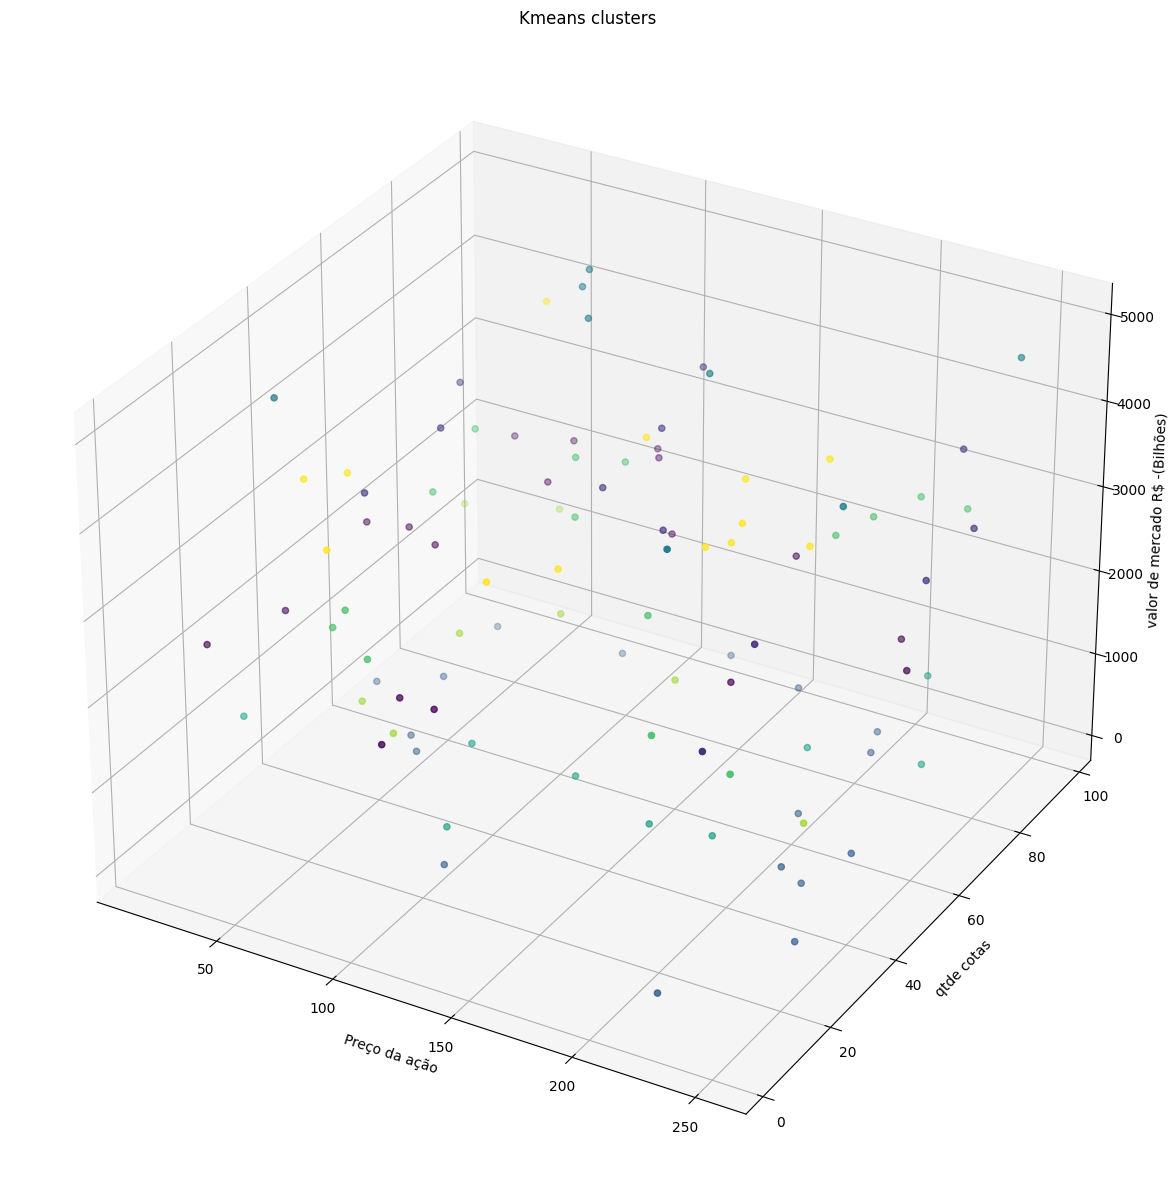

In [45]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(df['preço ação R$'],df['qtde cotas'],
           df['valor de mercado R$ -(Bilhões)'],c=labels)
ax.set_title('Kmeans clusters')
ax.set_xlabel('Preço da ação')
ax.set_ylabel('qtde cotas')
ax.set_zlabel('valor de mercado R$ -(Bilhões)')

Qual a maior vantagem do aprendizado não supervisionado diante o aprendizado supervisionado?
R: A maior vantagem do aprendizado não supervisionado em relação ao supervisionado é a capacidade de trabalhar com dados não rotulados, permitindo explorar grandes volumes de dados sem a necessidade de rótulos pré-definidos. Isso possibilita a descoberta de padrões e estruturas ocultas, além de ser útil em situações onde rotular dados é caro ou impraticável, tornando-o mais flexível e adaptável.